<a href="https://colab.research.google.com/github/Vasudeva-bit/Automobile-Price-Prediction/blob/main/Regression_model_(predicting_prices_of_automobiles).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine learning model to predict the sale prices of Bulldozer using the time series data.
#### A Regression model to predict the number.
#### We will be working on the this model using dataset of kaggle, and to be clear, we are working on a problem of predicting Bulldozer prices, which was a held competition on kaggle.
#### 1. Problem Definition
The goal of the model is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration.
The direct link to original version of problem statement is :
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/description

#### 2. Data
The data we use in this model is directly imported from kaggle.
The link to the data is : https://www.kaggle.com/c/bluebook-for-bulldozers/data
The data is split into three parts:

Train.csv is the training set, which contains data through the end of 2011.
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012.
#### 3. Evalutation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
Note: Our main goal like any other regression model is to minimize the error and in this case we need to end up making our model error small as possible.

#### 4. Features
The key fields are in train.csv are:

SalesID: the uniue identifier of the sale
MachineID: the unique identifier of a machine.  A machine can be sold multiple times
saleprice: what the machine sold for at auction (only provided in train.csv)
saledate: the date of the sale
There are several fields towards the end of the file on the different options a machine can have.  The descriptions all start with "machine configuration" in the data dictionary.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

#### I am importing data from the local machine but you can get access to it on my google drive and the link is :
https://drive.google.com/file/d/19B2HAK4Tlma-YhlJfXiXg-Wy1F68DSb8/view?usp=sharing


In [ ]:
# Mounting data from google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Converting my data into pandas dataframe to work well and explore the data them visualise it before going build a regression model.
df = pd.read_csv('/content/drive/MyDrive/TrainAndValid.csv/TrainAndValid.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Exploring our data

In [ ]:
# Looking at the data and their types to better work on building a model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [ ]:
pd.isna(df).sum()
# It is certain that the column "UsageBand" has highest number of missing samples

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [ ]:
# First of all, let us know different parameters we have and their names
df.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


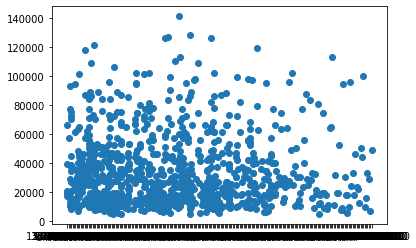

In [ ]:
# Effectively, we are not getting a clear picture of the data with just pandas functions so we shall visualise the data on plots using matplotlib.
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

(array([354., 236., 174.,  92.,  58.,  39.,  27.,  12.,   6.,   2.]),
 array([  4750.,  18375.,  32000.,  45625.,  59250.,  72875.,  86500.,
        100125., 113750., 127375., 141000.]),
 <a list of 10 Patch objects>)

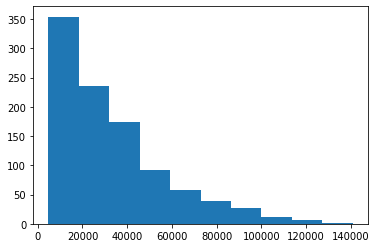

In [ ]:
# Now we shall have a look at the distribution on data mainly the saledate
plt.hist(df['SalePrice'][:1000])

###### It is the need that for time series problem to enrich the data may be like:
#### Parsing the date column in dataset to datetime object

In [ ]:
# Let's do parsing the date column in the dataset by importing again form the source file
df = pd.read_csv('/content/drive/MyDrive/TrainAndValid.csv/TrainAndValid.csv', parse_dates = ['saledate'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Look at the parse dates column
df['saledate'].head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

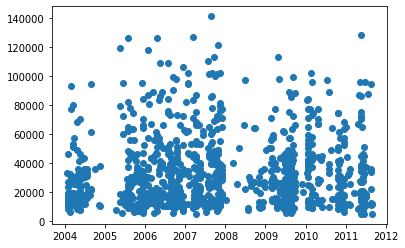

In [ ]:
# Now we plot the scatter graph once again on the parse date to feel the difference.
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [ ]:
# We kinda see that, this is more clear and tidy to look and understand about the data a little better then the earlier plot.
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Maybe we need to sort the data samples according to the saledate columns before going into our EDA(exploratory data analysis to become subject matter expert)
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [ ]:
# We shall now sort the data with respect to date column.
df.sort_values(by = ['saledate'], inplace = True, ascending = True)

In [ ]:
df.saledate.head(5)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [ ]:
df.head(5).T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [ ]:
# Let us make a copy original dataset so that we can manipulate data in copy
df_tem = df.copy()

#####Feature Engineering

In [ ]:
# Now that we made a copy of the data so we shall do some feature engineering
df_tem.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [ ]:
# We now shall use some datetime parameters given by pandas datetime object using datetime attributes
df_tem['SaleMonth'] = df_tem['saledate'].dt.month
df_tem['SaleYear'] = df_tem['saledate'].dt.year
df_tem['SaleWeek'] = df_tem['saledate'].dt.week
df_tem['SaleDay'] = df_tem['saledate'].dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
df_tem.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [ ]:
df_tem.drop('saledate', inplace = True, axis = 1)

In [ ]:
# Let us do some EDA before moving to model. We are no gonna do much EDA as scope to do that is there in modeling part.
df_tem.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [ ]:
# That is it doing EDA but we will be doing much during the modeling part

### 5. Modeling



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
X = df_tem.drop('SalePrice', axis = 1)
y = df_tem['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
reg.fit(X_train, y_train)

ValueError: ignored

Okay the error says that it could not convert some data into float which means some of the data is string or object, so as I said we do some EDA now
We shall now work on converting non numeric column to numeric columns so that we can train our model and before that if you have seen, data has lot of nan values which we shall try to avoid.

In [ ]:
# We shall now take a look at converting the non numeric columns in data frame into category type of pandas and later convert that to numeric codes which we can use in modeling part
for label, content in df_tem.items() : # label here means the column name and the content means the data in each column and basically it does iterate around them.
  if pd.api.types.is_string_dtype(content) :
    df_tem[label] = content.astype('category').cat.as_ordered()

In [ ]:
df_tem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [ ]:
# Pandas is so handy that we no need to convert the category part into numeric as it does for us.
df_tem.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [ ]:
df_tem.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [ ]:
# Yes, the conversion on data type of the object data is done and now we are all set to use the converted data in training the model and testing it.
df_tem.isna().sum()/len(df_tem)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [ ]:
# Let us same the current manipulated data for easy access in future.
df_tem.to_csv('/content/manipulated_data.csv', index = False)

In [ ]:
df_tem = pd.read_csv('/content/manipulated_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# We shall look into filling the null values in numeric columns in data frame first then we shall look into filling null values in category datatype columns.
# Let us check numeric columns with null values
for label, content in df_tem.items() :
  if pd.api.types.is_numeric_dtype(content) :
    if content.isna().sum() :
      print(label)

auctioneerID
MachineHoursCurrentMeter


In [ ]:
# We got the columns with null numeric values so we fill them with median values
for label, content in df_tem.items() :
  if pd.api.types.is_numeric_dtype(content) :
    if content.isna().sum() :
      df_tem[label+'_missing_values'] = pd.isnull(content)
      df_tem[label] = df_tem.fillna(content.median())

In [ ]:
# The reason I used median to fill instead of median is demonstrated down here :
hundreds = np.full(1000, 100)
billion_hundreds = np.full(100, 100000000)
print(hundreds.mean())
print(np.median(hundreds))
print(billion_hundreds.mean())
print(np.median(billion_hundreds))

100.0
100.0
100000000.0
100000000.0


In [ ]:
# Let us check numeric columns with null values
for label, content in df_tem.items() :
  if pd.api.types.is_numeric_dtype(content) :
    if content.isna().sum() :
      print(label)
# Now we can see that no numeric column has null as all are filled.

In [ ]:
df_tem.isna().sum()

SalesID                                         0
SalePrice                                       0
MachineID                                       0
ModelID                                         0
datasource                                      0
auctioneerID                                    0
YearMade                                        0
MachineHoursCurrentMeter                        0
UsageBand                                  339028
fiModelDesc                                     0
fiBaseModel                                     0
fiSecondaryDesc                            140727
fiModelSeries                              354031
fiModelDescriptor                          337882
ProductSize                                216605
fiProductClassDesc                              0
state                                           0
ProductGroup                                    0
ProductGroupDesc                                0
Drive_System                               305611


In [ ]:
# Cool, now that we have filled all the null values in numeric data columns with the median.

In [ ]:
df_tem.auctioneerID_missing_values.value_counts()

False    392562
True      20136
Name: auctioneerID_missing_values, dtype: int64

In [ ]:
# Till now we have looked into filling and cleaning numeric data and now we dive deep into category part.
for label, content in df_tem.items() :
  if not pd.api.types.is_numeric_dtype(content) :
    df_tem[label+'_missing_values'] = pd.isnull(content)
    df_tem[label] = pd.Categorical(content).codes +1
# The reason why I am adding one to the numeric form of category data is, for all null values pandas give -1 as values but as we know to make a good model it is neccasary to give positive values so adding 1 makes all null values to be 0

In [ ]:
# Let us verify again weather or not we have any thing to fill now
df_tem.isna().sum()

SalesID                             0
SalePrice                           0
MachineID                           0
ModelID                             0
datasource                          0
                                   ..
Backhoe_Mounting_missing_values     0
Blade_Type_missing_values           0
Travel_Controls_missing_values      0
Differential_Type_missing_values    0
Steering_Controls_missing_values    0
Length: 102, dtype: int64

In [ ]:
len(df_tem)

412698

In [ ]:
%%time
# Cool.., now we have our data ready so, we can take our model to next step and that is to train the model with the prepared data and then........ yes.
# A magic function in python to just know the time of running this cell as we our model need to learn form really long list of 41k.
reg = RandomForestRegressor(n_jobs = -1, random_state = 42)
# Fit our model
reg.fit(df_tem.drop('SalePrice', axis = 1), df_tem['SalePrice'])

CPU times: user 18min 9s, sys: 1.83 s, total: 18min 11s
Wall time: 9min 12s


In [ ]:
# Now that we have trained out basic model, though we did not split the data, but yet lets try testing our model on train data itself for fun,,,...
# Later on we shall focus on splitting the data and then getting the exact evaluation of the model.
reg.score(df_tem.drop('SalePrice', axis = 1), df_tem['SalePrice'])

0.9874704774121045

##### Real Splitting data

In [ ]:
df_tem.SaleYear
# We are now going to split the data into train and valid that to based on the criteria given in original event of kaggle which is based on year of sale

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: SaleYear, Length: 412698, dtype: int64

In [ ]:
df_tem['SaleYear'].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: SaleYear, dtype: int64

#### Note: Since we have already made manipultions on df_tem so we can not use this dataframe to split into train and valid
The reason is that we used the valid part of data to actually get a overall median and filled the null values of numeric columns accordingly so we use the original dataframe to manipulate after splitting, which make sures that we manipulate the data of both train and test accordingly.

In [ ]:
df['SaleMonth'] = df['saledate'].dt.month
df['SaleYear'] = df['saledate'].dt.year
df['SaleWeek'] = df['saledate'].dt.week
df['SaleDay'] = df['saledate'].dt.day
df.drop('saledate', inplace = True, axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
train_set = df_tem[df_tem['SaleYear'] != 2012]
valid_set = df_tem[df_tem['SaleYear'] == 2012]
len(train_set), len(valid_set)

(401125, 11573)

In [ ]:
# Let us split the data into X_train, y_train, X_test, y_test
X_train, y_train = train_set.drop('SalePrice', axis = 1), train_set['SalePrice']
X_valid, y_valid = valid_set.drop('SalePrice', axis = 1), valid_set['SalePrice']
len(X_train), len(X_valid), len(y_train), len(y_valid)

(401125, 11573, 401125, 11573)

In [ ]:
# Creating our own evaluation metrics since the evaluation metrics to the competition is RMSLE as mentioned on the top of the notebook.
# We shall use the sklearn metrics
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
# We have imported the mean_squared_log_error
def rmsle(y_true, y_preds) :
  '''
  This is just a small function to get us RMSLE value using MSLE given by sklearn.metrics
  '''
  score = mean_squared_log_error(y_true, y_preds)
  return np.sqrt(score)

def show_diff_evaluation_model(y_true, y_preds) :
  evaluation_scores = {'train_r2' : r2_score(y_true, y_preds), 
                       'valid_r2' : r2_score(y_true, y_preds),
                       'train_RMSLE': rmsle(y_true, y_preds), 
                       'valid_RMSLE' : rmsle(y_true, y_preds), 
                       'train_MAE' : mean_absolute_error(y_true, y_preds) ,
                       'valid_MAE' : mean_absolute_error(y_true, y_preds)}
  return evaluation_scores

#### Reducing the data samples 
as large data leading to long time training of model which is close to 12 minutes and we do not need that so we decrease the samples in the set to do so and for that we have an handy parameter in RandomForestRegressor

In [ ]:
len(train_set)

401125

In [ ]:
%%time
model = RandomForestRegressor(n_jobs = -1,
                              random_state = 42, 
                              max_samples = 10000)
# In here, instead of going for 400 thousand data samples, to reduce the training time, we are making it just 10,000
model.fit(X_train, y_train)

CPU times: user 35 s, sys: 173 ms, total: 35.1 s
Wall time: 18.6 s


In [ ]:
show_diff_evaluation_model(y_valid, model.predict(X_valid))

{'train_MAE': 7092.549080618682,
 'train_RMSLE': 0.29013448837567146,
 'train_r2': 0.8356037056127875,
 'valid_MAE': 7092.549080618682,
 'valid_RMSLE': 0.29013448837567146,
 'valid_r2': 0.8356037056127875}

#### Hyperparameter tuning with RandomizedSearchCV

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
# Creating a grid of 'to be tuned parameters'.
rs_grid = {'n_estimators' : np.arange(10, 100, 10), 
           'max_samples' : [10000],
           'min_samples_split' : np.arange(2, 20, 2), 
           'min_samples_leaf' : np.arange(1, 20, 2),
           'max_features' : [0.5, 'auto', 'sqrt'], 
           'max_depth' : [None, 3, 5, 10]}
# Instantiate our RandomSearchCV
reg = RandomForestRegressor(n_jobs = -1, random_state = 42)
rs_rf = RandomizedSearchCV(reg, 
                       param_distributions = rs_grid, 
                       cv = 5, 
                       n_iter = 2, 
                       verbose = 2)
# Let us fit the model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=13, max_samples=10000, max_features=0.5, max_depth=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=13, max_samples=10000, max_features=0.5, max_depth=None, total=   6.5s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=13, max_samples=10000, max_features=0.5, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=13, max_samples=10000, max_features=0.5, max_depth=None, total=   5.5s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=13, max_samples=10000, max_features=0.5, max_depth=None 
[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=13, max_samples=10000, max_features=0.5, max_depth=None, total=   5.3s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=13, max_samples=10000, max_features=0.5, max_depth=None 
[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=13, max_samples=10000, max_features=0.5, max_depth=None, total=   5.5s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=13, max_samples=10000, max_features=0.5, max_depth=None 
[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=13, max_samples=10000, max_features=0.5, max_depth=None, total=   5.3s
[CV] n_estimators=60, min_samples_split=10, min_samples_leaf=3, max_samples=10000, max_features=auto, max_depth=10 
[CV] 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished


CPU times: user 35.1 s, sys: 1.16 s, total: 36.3 s
Wall time: 1min 21s


In [ ]:
rs_rf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'max_samples': 10000,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 60}

In [ ]:
# Evaluate our best model.
show_diff_evaluation_model(y_valid, rs_rf.predict(X_valid))

{'train_MAE': 7827.732256984778,
 'train_RMSLE': 0.31317714809709635,
 'train_r2': 0.7989985793151955,
 'valid_MAE': 7827.732256984778,
 'valid_RMSLE': 0.31317714809709635,
 'valid_r2': 0.7989985793151955}

#### Training with best parameters
'Note' The parameters we are using, so called ideal are from the output of running the RandomizedSearchCV for 100 iters and above we took only n_iter as 2.



In [ ]:
%%time
best_reg = RandomForestRegressor(n_estimators = 40, 
                                 n_jobs = -1, 
                                 min_samples_leaf = 1, 
                                 min_samples_split = 14, 
                                 max_features = 0.5, 
                                 random_state = 42)
# Training model on all data.
best_reg.fit(X_train, y_train)

In [ ]:
# Evaluate the model
show_diff_evaluation_model(y_valid, best_reg.predict(X_valid))

{'train_MAE': 6010.3513817856465,
 'train_RMSLE': 0.24821147308963365,
 'train_r2': 0.880052069541272,
 'valid_MAE': 6010.3513817856465,
 'valid_RMSLE': 0.24821147308963365,
 'valid_r2': 0.880052069541272}

Really cool and the RMSLE is just 0.248211... which is quite good to go.
Note: the final test data is just released in the last week, so for now we are evaluating our model on the validation score of the model.

### Feature Importance
The feature that is contributing alot to performance of the model.

In [ ]:
len(best_reg.feature_importances_)

101

In [ ]:
best_reg.feature_importances_

array([1.83791168e-02, 2.00560394e-02, 4.24501837e-02, 7.66048252e-04,
       1.82641173e-02, 2.05505295e-01, 1.81169357e-02, 1.37485268e-03,
       3.59751786e-02, 5.01639751e-02, 6.13178198e-02, 4.48193533e-03,
       2.45255361e-02, 1.58174864e-01, 4.18170189e-02, 6.28285756e-03,
       1.36585480e-03, 2.91641944e-03, 2.52246901e-03, 5.37304896e-02,
       1.37837154e-03, 4.30339690e-05, 8.78223470e-04, 6.13506745e-04,
       1.04688319e-03, 2.54017052e-05, 9.49281943e-05, 1.23473854e-02,
       2.41584385e-03, 2.16424870e-03, 2.20692888e-03, 2.81098023e-03,
       2.46016591e-03, 1.33576754e-03, 4.23010039e-03, 9.01330367e-03,
       1.29898765e-03, 1.21985469e-02, 3.24973059e-03, 8.34272982e-04,
       1.51843604e-03, 1.10963232e-03, 2.54341813e-03, 5.71579528e-04,
       3.61106913e-04, 3.83893578e-04, 3.69518070e-04, 1.95502236e-03,
       7.34841419e-04, 2.35775222e-04, 1.51453460e-04, 4.23722480e-03,
       7.17240815e-02, 8.45845816e-03, 5.99897435e-03, 0.00000000e+00,
      

In [ ]:
# Now that we got the model with corresponding feature importance so lets visualise for better understanding.
# Function to plot things
def plot_features(columns, importances, n_samples = 20) :
  df = (pd.DataFrame({'columns' : columns, 
                     'importances' : importances}).sort_values('importances', ascending = True).reset_index(drop = True))
  # ploting features
  fig, ax = plt.subplots()
  ax.barh(df['columns'][:n_samples], df['importances'][:n_samples])
  ax.set_ylabel('importances of features')
  ax.set_xlabel('feaure names')

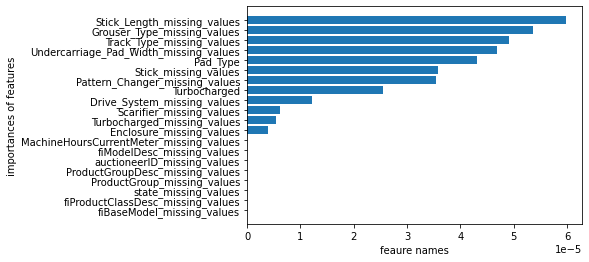

In [ ]:
plot_features(X_valid.columns, best_reg.feature_importances_)

#### Product size == size of bulldozers
and same like enclosure i.e., weather the cab of bulldozer is large, A/C. or so and all other features mean something.
Just go to very first link.
#### To improve the accuracy, I am currently working with other algo fomr CatBoost and even exploring XGBoost so will update that soon